In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Deterministic utilities
q_a = 5.673
q_b = 3.46

# Potential prices
p_b_dummy = np.arange(0, 5, 0.005)
p_a_dummy = np.arange(0, 5, 0.005)

# Best responses for each price set by the competitor
BR_a = np.ones(len(p_a_dummy))
BR_b = np.ones(len(p_b_dummy))

for p_b in p_b_dummy:
  profits_a = list((np.exp(q_a - 2 * p_a_dummy)/(1 + np.exp(q_a - 2 * p_a_dummy) + np.exp(q_b - 2 * p_b))) * (p_a_dummy - 0.1))
  optimal_p_a = p_a_dummy[np.argmax(profits_a)]
  BR_a[list(p_b_dummy).index(p_b)] = optimal_p_a

for p_a in p_a_dummy:
  profits_b = list((np.exp(q_b - 2 * p_b_dummy)/(1 + np.exp(q_a - 2 * p_a) + np.exp(q_b - 2 * p_b_dummy))) * (p_b_dummy - 0.1))
  optimal_p_b = p_b_dummy[np.argmax(profits_b)]
  BR_b[list(p_a_dummy).index(p_a)] = optimal_p_b

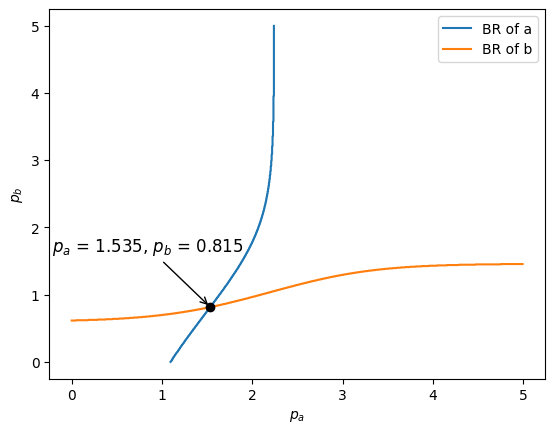

In [ ]:
# Finding the mutual best responses
NE_prices = []
tolerance = 0.00052 # Define a small tolerance for floating-point comparisons

for p_a, p_b in zip(BR_a, p_b_dummy):
    for p_b_prime, p_a_prime in zip(BR_b, p_a_dummy):
        if np.abs(p_a - p_a_prime) < tolerance and np.abs(p_b - p_b_prime) < tolerance:
            NE_prices.append((round(p_a, 3), round(p_b, 3)))

# Best response plots
plt.plot(BR_a, p_b_dummy, label = 'BR of a')
plt.plot(p_a_dummy, BR_b, label = 'BR of b')
plt.scatter(NE_prices[0][0], NE_prices[0][1], color = 'black', zorder = 3)
plt.annotate(f'$p_a$ = {NE_prices[0][0].round(3)}, $p_b$ = {NE_prices[0][1].round(3)}',
             (NE_prices[0][0], NE_prices[0][1]),
             textcoords = 'offset points',
             xytext = (-45, 40),
             ha = 'center',
             fontsize = 12,
             arrowprops = dict(arrowstyle = '->', lw = 1))

plt.legend()
plt.xlabel('$p_a$')
plt.ylabel('$p_b$')
plt.savefig('best-response pricing', dpi = 500)
plt.show()